# Dogecoin Price Prediction

![](https://image.cnbcfm.com/api/v1/image/106881294-1620749189576-gettyimages-1232802276-Dogecoin.jpeg?v=1620749225)

### Contents
1. Abstract
2. Dataset
3. Goal
4. Importing required libraries and Dataset
5. Data Visualization
    - Data v/s Volumn graph
    - Performance of Dogecoin in 2021
    - Opening price visualization for 2021
    - Maximum price visualization for 2021
    - Lowest price visualization for 2021
    - Closing price visualization for 2021
    - Adjustment price visualization for 2021
    - Correlation Heatmap
6. Prediction Models
    - Spliting the dataset into 70:30 ratio
    - Deploying the models
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression
        - Lasso Regression
        - Ridge Regression
        - MLP Regression
        - XgBoost Regression
        - Gradient Boosting Regression
        - Support Vector Regression
7. Comparing the accuracy of the models
8. Conclusion

### Abstract
Dogecoin (/ˈdoʊ(d)ʒkɔɪn/ DOHZH-koyn or DOHJ-koyn, code: DOGE, symbol: Ð) is a cryptocurrency created by software engineers Billy Markus and Jackson Palmer, who decided to create a payment system as a joke, making fun of the wild speculation in cryptocurrencies at the time. Despite its satirical nature, some consider it a legitimate investment prospect. Dogecoin features the face of the Shiba Inu dog from the "Doge" meme as its logo and namesake. It was introduced on December 6, 2013, and quickly developed its own online community, reaching a market capitalization of US$85,314,347,523 on May 5, 2021.

Originally formed as a joke, Dogecoin was created by IBM software engineer Billy Markus and Adobe software engineer Jackson Palmer. They wanted to create a peer-to-peer digital currency that could reach a broader demographic than Bitcoin. In addition, they wanted to distance it from the controversial history of other coins. Dogecoin was officially launched on December 6, 2013, and within the first 30 days, there were over a million visitors to Dogecoin.com.


### Dataset
The dataset is collected from Kaggle website. Here is the link : https://www.kaggle.com/dhruvildave/dogecoin-historical-data

### Goal
The goal of this project is to make a Prediction model which will predict the price of the Dogecoin in the future times depending on the previous parameters.


### Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('DOGE-USD.csv')

In [3]:
df.head(11)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0
5,2014-09-22,0.000288,0.000301,0.000285,0.000298,0.000298,620222.0
6,2014-09-23,0.000298,0.000318,0.000295,0.000313,0.000313,739197.0
7,2014-09-24,0.000314,0.000353,0.000310,0.000348,0.000348,1277840.0
8,2014-09-25,0.000347,0.000383,0.000332,0.000375,0.000375,2393610.0
9,2014-09-26,0.000374,0.000467,0.000373,0.000451,0.000451,4722610.0


In [4]:
df1 = df.tail(135)
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2339,2021-02-11,0.072844,0.074301,0.068290,0.069676,0.069676,3.818557e+09
2340,2021-02-12,0.069650,0.072610,0.061445,0.070069,0.070069,4.190844e+09
2341,2021-02-13,0.070025,0.071646,0.066135,0.066450,0.066450,2.618050e+09
2342,2021-02-14,0.066448,0.066448,0.056723,0.062537,0.062537,3.984668e+09
2343,2021-02-15,0.062568,0.063924,0.048547,0.056591,0.056591,4.944805e+09


Here we see the data ranges from 2014 to 2021.

Let Check the null values in the dataset

In [5]:
df.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [6]:
#list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
 
#print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Open 0.0016  % missing values
High 0.0016  % missing values
Low 0.0016  % missing values
Close 0.0016  % missing values
Adj Close 0.0016  % missing values
Volume 0.0016  % missing values


### Data Visualization
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps.

**A. Date v/s Volumn Graph**

Text(0.5, 1.0, 'Date vs Volume')

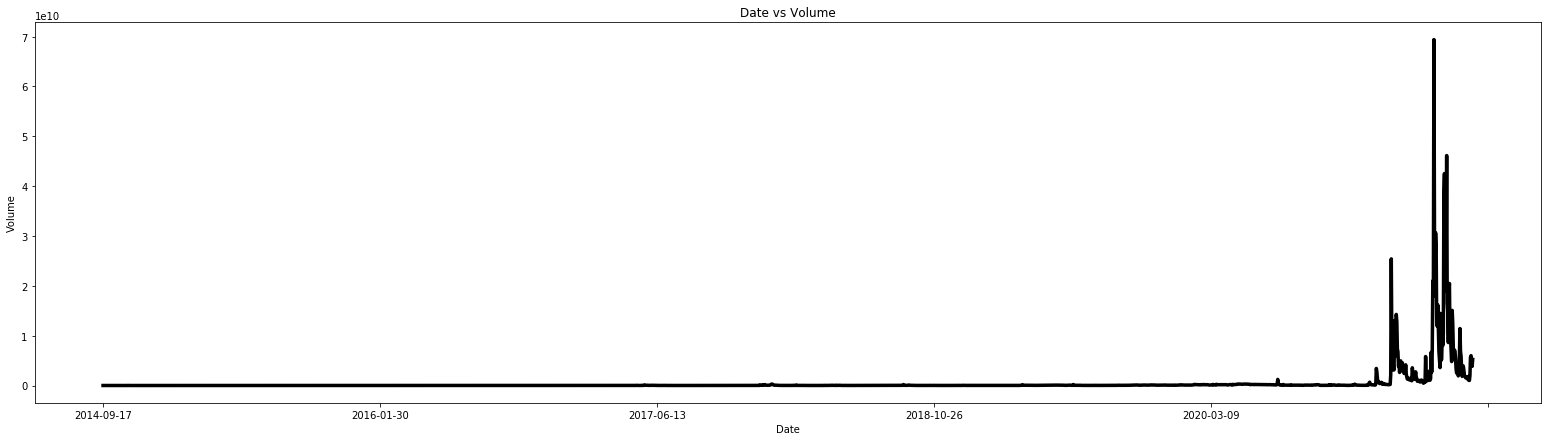

In [7]:
plt.figure(figsize=(27,7))
df.groupby('Date')['Volume'].median().plot(linewidth = 3.5, color = 'k')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume")

**B. Performance of Dogecoin in the year 2021**

Text(0.5, 1.0, 'Date vs Volume of 2021')

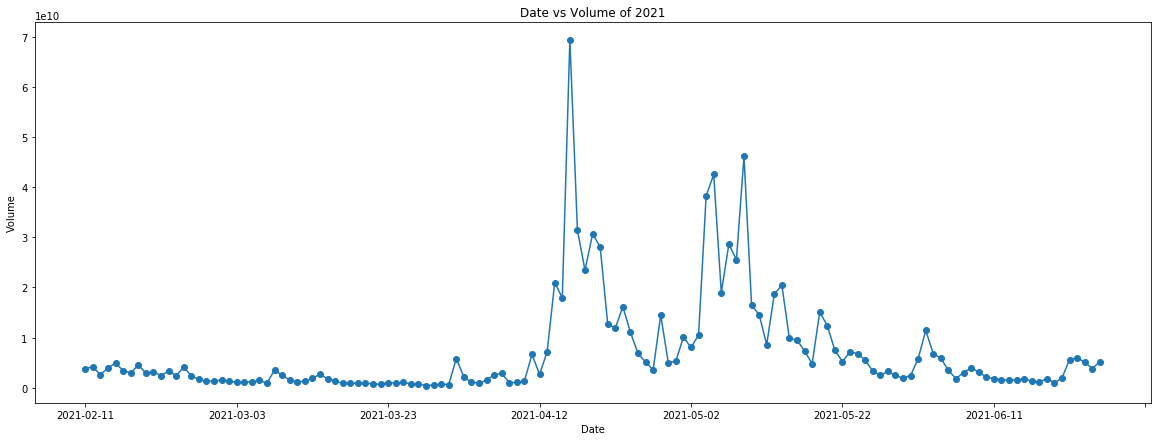

In [8]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Volume'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume of 2021")

**C. Opening price for Dogecoin everyday throughout the year 2021**

Text(0.5, 1.0, 'Date vs Open of 2021')

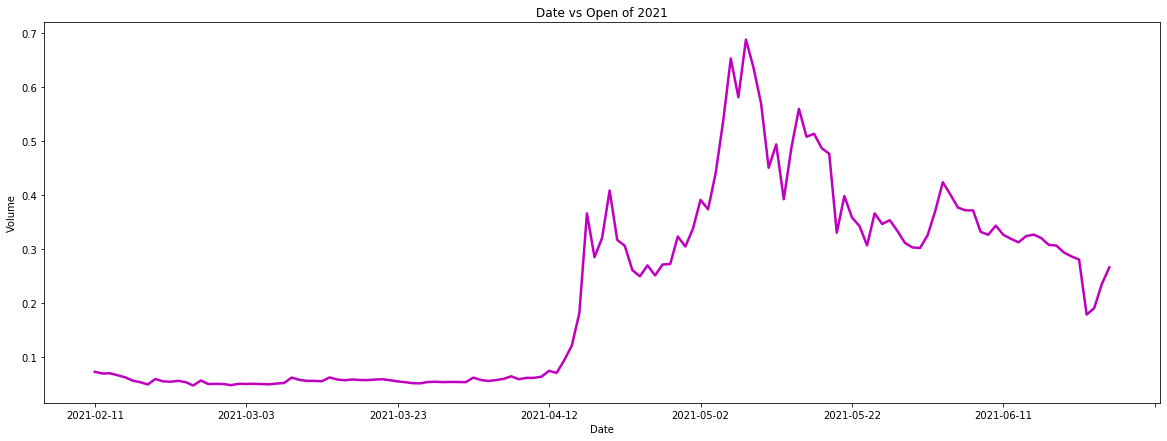

In [9]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Open'].mean().plot(linewidth = 2.5, color = 'm')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Open of 2021")

**D. Maximum price achieved by Dogecoin everyday throughout the year 2021**

Text(0.5, 1.0, 'Date vs High of 2021')

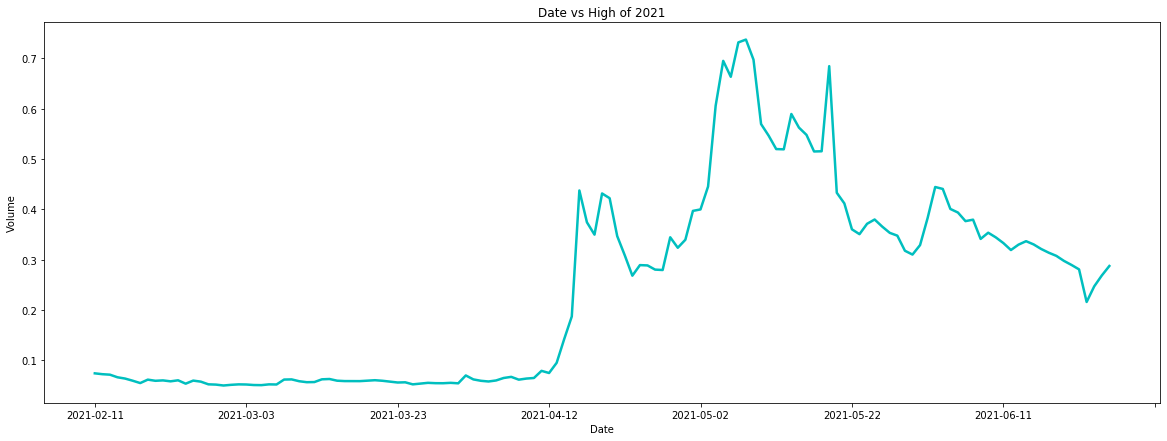

In [10]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['High'].mean().plot(linewidth = 2.5, color = 'c')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs High of 2021")

**E. Lowest price achieved by Dogecoin everyday throughout the year 2021**

Text(0.5, 1.0, 'Date vs Low of 2021')

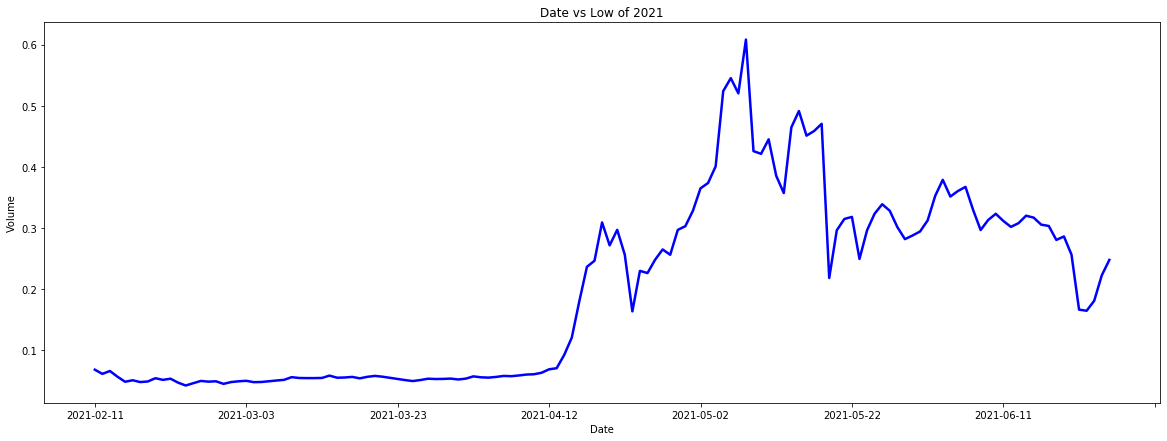

In [11]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Low'].mean().plot(linewidth = 2.5, color = 'b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Low of 2021")

**F. Closing price achieved by Dogecoin everyday throughout the year 2021**

Text(0.5, 1.0, 'Date vs Close of 2021')

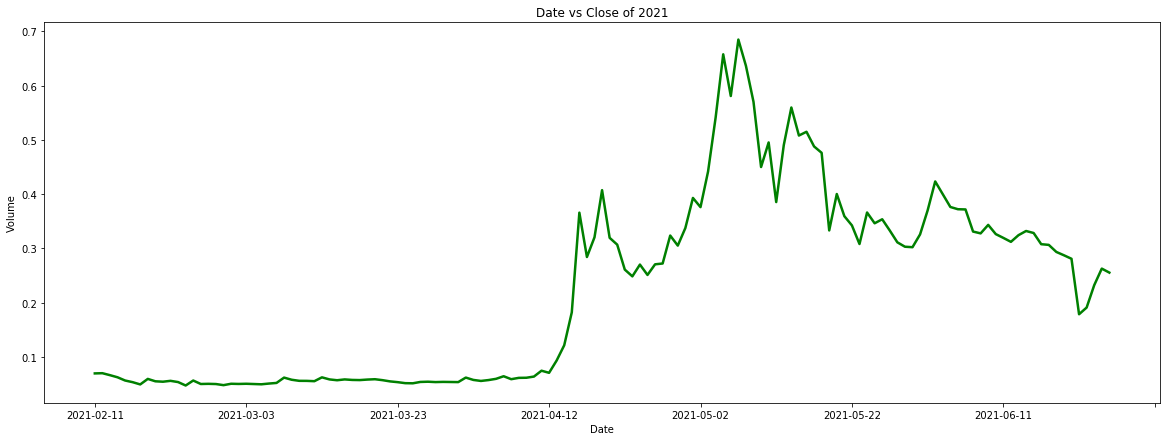

In [12]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Close'].mean().plot(linewidth = 2.5, color = 'g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

**G. Adjustment price of Dogecoin everyday throughout the year 2021**

Text(0.5, 1.0, 'Date vs Adj Close of 2021')

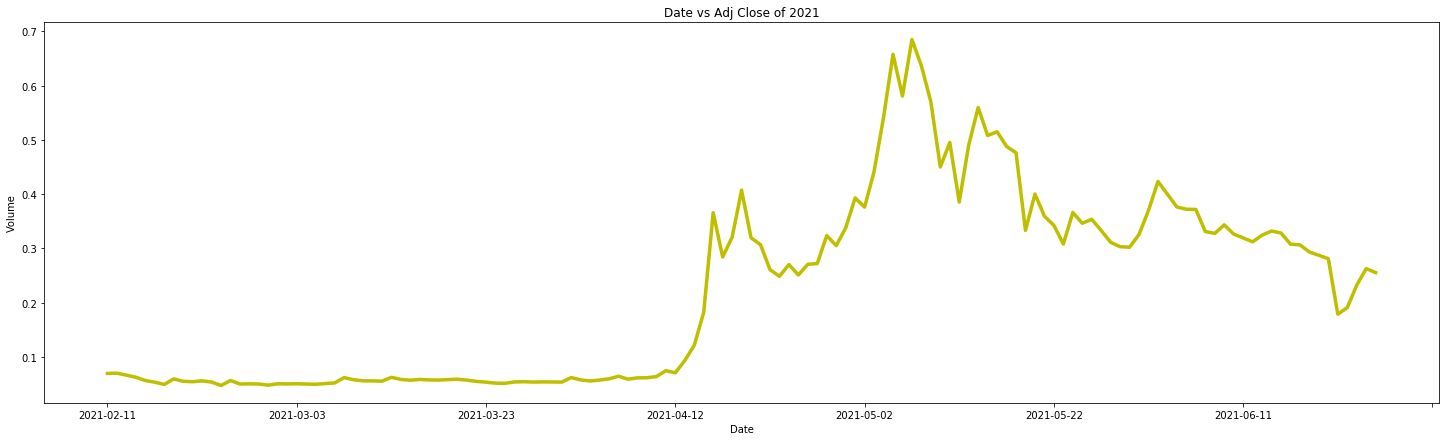

In [13]:
plt.figure(figsize=(25,7))
df1.groupby('Date')['Adj Close'].mean().plot(linewidth = 3.5, color = 'y')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Adj Close of 2021")

#### G. Lets Check the correlation between features of the dataset. How much they close to eachother.

In [15]:
new_df =pd.read_csv('DOGE-USD.csv', usecols = ['Open','High','Low','Close','Volume']).fillna(method='ffill')

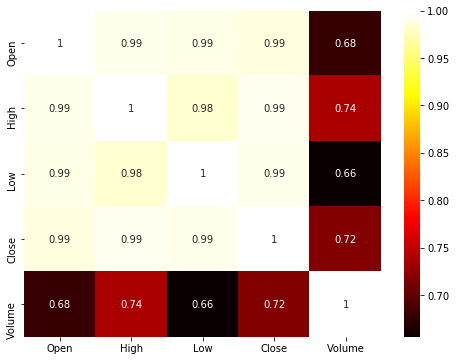

In [16]:
plt.figure(figsize = (8,6))
sns.heatmap(new_df.corr() , cmap = 'hot', annot = True)

From the above figure we can see that all the features are closely related to each other.

***************
##   Prediction Model Creation

Predictive modeling, also called predictive analytics, is a mathematical process that seeks to predict future events or outcomes by analyzing patterns that are likely to forecast future results.

Now to build that prediction model I amgoing to use regression algorithms. Now let's find out what is regression algorithms?

Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

Here we are going to prepare several Regression machine learning models based on those we will do a comparative analysis that which model is better among them.

I have decided to go with nine regression models to evaluate this dataset - 

* **Linear Regression** : Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).


* **Random Forest Regression** : Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.


* **Decision Tree Regression** : Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.


* **Lasso Regression** : In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.


* **Ridge Regression** : Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.


* **XgBoost Regressor** : XGBoost is a powerful approach for building supervised regression models. ... Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.


* **MLP Regressor** : A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.


* **Gradient Boosting Regressor** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


* **Support Vector Machine Regressor** : Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

Let's deploy the models...

**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 70:30 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [17]:
X = new_df.drop('High', axis=1)
y = new_df['High']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (2474, 4)
Shape of y =  (2474,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1731, 4)
Shape of y_train =  (1731,)
Shape of X_test =  (743, 4)
Shape of y_test =  (743,)


### Random Forest Regression 
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [33]:
from sklearn import metrics

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
regressor = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [34]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.001060333658142666
Residual Sum of Squares(MSE): 0.00010849124576265697
R2-Score: 0.9803678227823399


In [22]:
y_pred = regressor.predict(X_test)

In [24]:
ds = pd.DataFrame()
ds['High']=y_test

In [25]:
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.000217
2037,0.001975,0.001995
952,0.000552,0.000561
1615,0.002124,0.002115
1712,0.003115,0.003148
1234,0.005023,0.005017
1605,0.001957,0.001956
56,0.000248,0.000248
2194,0.002814,0.002840
926,0.000360,0.000340


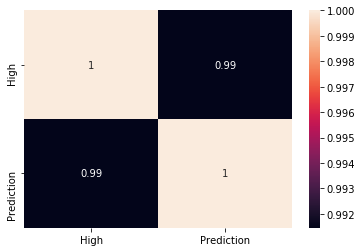

In [26]:
sns.heatmap(ds.corr(), annot = True)

### Simple Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = regr.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0008141271412345852
Residual Sum of Squares(MSE): 6.683717397422039e-05
R2-Score: 0.9879053905689308


In [45]:
y_pred = regressor.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)


,High,Prediction
873,0.000216,0.000217
2037,0.001975,0.001995
952,0.000552,0.000561
1615,0.002124,0.002115
1712,0.003115,0.003148
1234,0.005023,0.005017
1605,0.001957,0.001956
56,0.000248,0.000248
2194,0.002814,0.002840
926,0.000360,0.000340


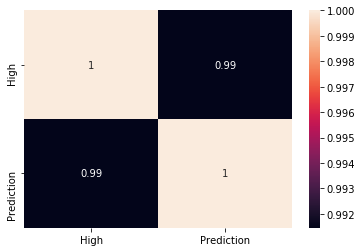

In [46]:
sns.heatmap(ds.corr(), annot = True)

### Decision Tree Regressor
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
y_pred = dtr.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0013870632570659488
Residual Sum of Squares(MSE): 0.0001383018694939435
R2-Score: 0.9749734018412998


In [49]:
y_pred = regressor.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.000217
2037,0.001975,0.001995
952,0.000552,0.000561
1615,0.002124,0.002115
1712,0.003115,0.003148
1234,0.005023,0.005017
1605,0.001957,0.001956
56,0.000248,0.000248
2194,0.002814,0.002840
926,0.000360,0.000340


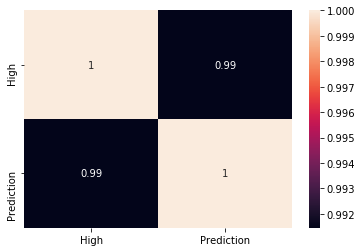

In [50]:
sns.heatmap(ds.corr(), annot = True)

### Lasso Regression
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [51]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [52]:
y_pred = lasso.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.014953047193295151
Residual Sum of Squares(MSE): 0.002368090539060236
R2-Score: 0.5714790368247655


In [57]:
y_pred = lasso.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.006940
2037,0.001975,0.009917
952,0.000552,0.006962
1615,0.002124,0.007402
1712,0.003115,0.008146
1234,0.005023,0.007463
1605,0.001957,0.007253
56,0.000248,0.006948
2194,0.002814,0.009516
926,0.000360,0.006983


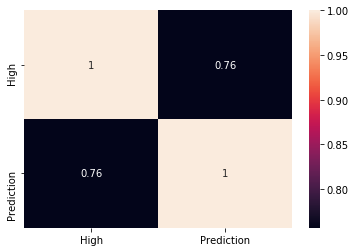

In [58]:
sns.heatmap(ds.corr(), annot = True)

### Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [55]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

D:\my project\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.53706e-24): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1)

In [56]:
y_pred = ridge.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.001144805315852194
Residual Sum of Squares(MSE): 0.00011593185349480302
R2-Score: 0.9790213977452069


In [59]:
y_pred = ridge.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.000062
2037,0.001975,0.002300
952,0.000552,0.000403
1615,0.002124,0.002030
1712,0.003115,0.003153
1234,0.005023,0.004443
1605,0.001957,0.001848
56,0.000248,0.000083
2194,0.002814,0.003125
926,0.000360,0.000172


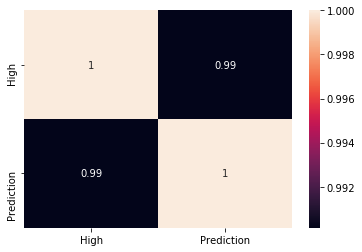

In [60]:
sns.heatmap(ds.corr(), annot = True)

### XgBoost Regressor 
XGBoost is a powerful approach for building supervised regression models. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.

In [61]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[21:58:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [62]:
y_pred = xgb.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0010599374725475284
Residual Sum of Squares(MSE): 7.463099467768296e-05
R2-Score: 0.9864950494102739


In [63]:
y_pred = xgb.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.000259
2037,0.001975,0.002082
952,0.000552,0.000580
1615,0.002124,0.002090
1712,0.003115,0.003099
1234,0.005023,0.004891
1605,0.001957,0.001930
56,0.000248,0.000279
2194,0.002814,0.002918
926,0.000360,0.000376


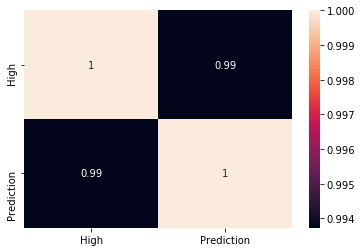

In [64]:
sns.heatmap(ds.corr(), annot = True)

### MLP Regressor 
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [65]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

MLPRegressor()

In [67]:
y_pred = mlp.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 411.03662198548926
Residual Sum of Squares(MSE): 5796975.130922433
R2-Score: -1048999319.6051885


In [68]:
y_pred = mlp.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.389319
2037,0.001975,-130.470367
952,0.000552,-0.580423
1615,0.002124,-19.929683
1712,0.003115,-52.644209
1234,0.005023,-22.593980
1605,0.001957,-13.378350
56,0.000248,0.017258
2194,0.002814,-112.856780
926,0.000360,-1.487009


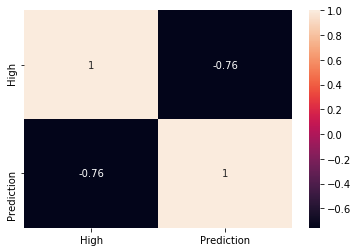

In [69]:
sns.heatmap(ds.corr(), annot = True)

### Gradient Boosting Regressor 
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [71]:
y_pred = gb.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0011036522727311128
Residual Sum of Squares(MSE): 0.00010268389790489981
R2-Score: 0.9814186991134819


In [72]:
y_pred = gb.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.000236
2037,0.001975,0.002106
952,0.000552,0.000546
1615,0.002124,0.002139
1712,0.003115,0.003155
1234,0.005023,0.004835
1605,0.001957,0.001798
56,0.000248,0.000254
2194,0.002814,0.002909
926,0.000360,0.000353


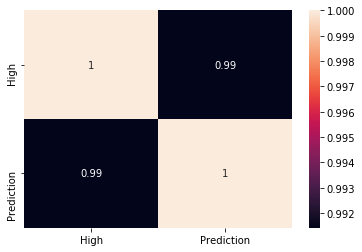

In [73]:
sns.heatmap(ds.corr(), annot = True)

### Support Vector Machine Regressor 
Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

In [74]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [75]:
y_pred = svm.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.06938625246830574
Residual Sum of Squares(MSE): 0.006015430851335677
R2-Score: -0.08853026512717155


In [76]:
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
873,0.000216,0.063551
2037,0.001975,0.074266
952,0.000552,0.063625
1615,0.002124,0.065133
1712,0.003115,0.067749
1234,0.005023,0.065343
1605,0.001957,0.064619
56,0.000248,0.063579
2194,0.002814,0.072758
926,0.000360,0.063695


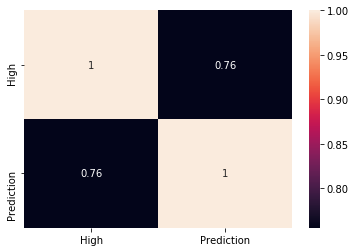

In [77]:
sns.heatmap(ds.corr(), annot = True)

------------------------
### Comparative analysis among the algorithms for this project

We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Linear Regression|98.79%|
|Decision Tree Regressor|97.50%|
|Random Forest Regressor|98.04%|
|Lasso Regression|57.15%|
|Ridge Regression|97.90%|
|XgBoost Regressor|98.65%|
|MLP Regressor|-104%|
|Gradient Boosting Regressor|98.14%|
|Support Vector Regressor|-8.85%|

### Conclusion

**Comparing all those scores scored by the machine learning algorithms, it is clear that Linear Regression is having the upper hand in case of this dataset and after this, we can use  XgBoosting Regressor, which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Linear Regression
2. XgBoosting Regression
3. Gradient Boosting Regression
4. Random Forest Regression
5. Ridge Regression
6. Decision Tree Regressor
7. Lasso Regression
8. Support Vector Regressor
9. MLP Regressor


Hooray!! The models are deployed successfully!

## Hope this project will help you! Thank you!